In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
!pip install yellowbrick

     |████████████████████████████████| 25.0 MB 56.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 274 kB 5.4 MB/s 


In [3]:
import os, sys
import random
import math
import numpy as np
import skimage.io
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2gray
from skimage import feature
import cv2
from sklearn.svm import LinearSVC
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import copy
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from keras.models import load_model
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from skimage.feature import hog
from skimage import data, exposure

In [4]:
os.chdir("/content/drive/My Drive/sceneDet/Dataset")
sys.path.append("/content/drive/My Drive/sceneDet/Dataset")
  
# Root directory of the project
ROOT_DIR = os.path.abspath(".")
sys.path.append(ROOT_DIR)

In [5]:
def lbp(nP, r, img):
  lbp = feature.local_binary_pattern(img, nP, r, method="uniform")
  return lbp

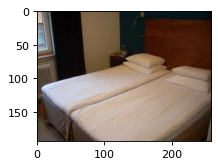

In [6]:
images = skimage.io.imread_collection("/content/drive/My Drive/sceneDet/Dataset/indoor/xyz.1.jpg")
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(image)

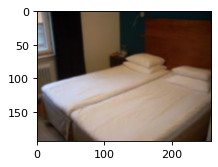

In [7]:
images = skimage.io.imread_collection("/content/drive/My Drive/sceneDet/Dataset/indoor/xyz.1.jpg")
plt.figure(figsize=(50,50), dpi = 80)
columns = 15
for (i, image) in enumerate(images):
  plt.subplot(len(images)/ columns + 1, columns, i+1 )
  blurr = cv2.GaussianBlur(image,(5,5),1)
  plt.imshow(blurr)

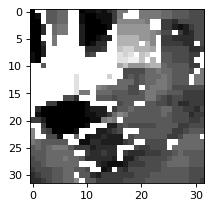

In [8]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(16, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

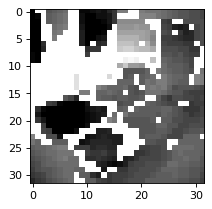

In [9]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(32, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

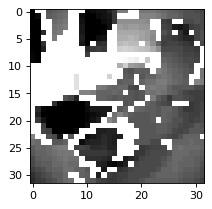

In [10]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(40, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

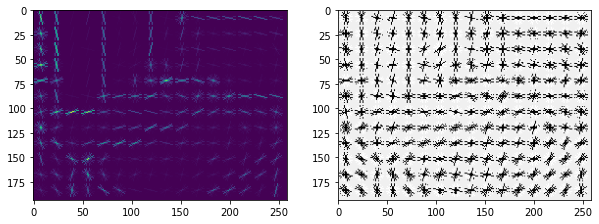

In [11]:
images = skimage.io.imread_collection("/content/drive/My Drive/sceneDet/Dataset/indoor/xyz.1.jpg")
columns = 15
for (i, image) in enumerate(images):
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
  lbpRslt = lbp(16, 8, hog_image)
  
  fig, axs = plt.subplots(1,2,figsize=(10,10))
  axs[0].imshow(hog_image)
  axs[1].imshow(lbpRslt,cmap='gray')
  

In [12]:
IMG_SIZE = 100

DATADIR = "/content/drive/My Drive/sceneDet/Dataset"
CATEGORIES = ["indoor", "outdoor"]
TEST_DATADIR = "/content/drive/My Drive/sceneDet/Dataset/test"

#**Training Data with Support Vector Machine**

In [13]:
flat_data_arr_svm = []
target_arr_svm = []

for i in CATEGORIES:
    
    print(f'loading... category : {i}')
    path=os.path.join(DATADIR,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr_svm.append(img_resized.flatten())
        target_arr_svm.append(CATEGORIES.index(i))
    print(f'loaded category:{i} successfully')

flat_data_svm=np.array(flat_data_arr_svm)
target_svm=np.array(target_arr_svm)
df=pd.DataFrame(flat_data_svm) #dataframe
df['Target']=target_svm
x_svm = df.iloc[:,:-1] #input data 
y_svm = df.iloc[:,-1] #output data

loading... category : indoor
loaded category:indoor successfully
loading... category : outdoor
loaded category:outdoor successfully


In [14]:
print(x_svm)
print(y_svm)

        0         1         2      ...     67497     67498     67499
0    0.513725  0.525490  0.443137  ...  0.342328  0.359739  0.336105
1    0.623673  0.604458  0.601830  ...  0.393451  0.436588  0.413059
2    0.023529  0.035294  0.011765  ...  0.386797  0.324052  0.182876
3    0.006797  0.014000  0.006405  ...  0.191111  0.074902  0.041451
4    0.631373  0.643137  0.662745  ...  0.803922  0.776360  0.478431
..        ...       ...       ...  ...       ...       ...       ...
795  0.517647  0.623529  0.737255  ...  0.550980  0.656863  0.770588
796  0.673948  0.822967  0.968065  ...  0.270307  0.350699  0.106719
797  0.644536  0.703359  0.864144  ...  0.126052  0.112327  0.102242
798  0.141458  0.321850  0.557144  ...  0.220170  0.220170  0.236137
799  0.795516  0.760222  0.826889  ...  0.321288  0.329131  0.246778

[800 rows x 67500 columns]
0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Target, Length: 800, dtype: int64


In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid_linear={'C':[1],'gamma':[0.1],'kernel':['linear']}
param_grid_rbf={'C':[1],'gamma':[0.1],'kernel':['rbf']}
param_grid_poly={'C':[1],'gamma':[0.1],'kernel':['poly']}

svc=svm.SVC(probability=True)

model_svm_linear = GridSearchCV(svc,param_grid_linear, n_jobs = -1) #linear
model_svm_rbf = GridSearchCV(svc,param_grid_rbf, n_jobs = -1) #rbf
model_svm_poly = GridSearchCV(svc,param_grid_poly, n_jobs = -1) #poly

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')


model_svm_linear.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images linear')

Splitted Successfully
The Model is trained well with the given images linear


In [18]:
y_pred_svm = model_svm_linear.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 0 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 64.375% accurate
confusion matrix:  [[49 26]
 [31 54]]
F1 Score:  0.6545454545454545
Precision:  0.675
Recall:  0.6352941176470588


In [19]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')

model_svm_rbf.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images rbf')

Splitted Successfully
The Model is trained well with the given images rbf


In [20]:
y_pred_svm = model_svm_rbf.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 50.0% accurate
confusion matrix:  [[ 0  0]
 [80 80]]
F1 Score:  0.6666666666666666
Precision:  1.0
Recall:  0.5


In [21]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')


model_svm_poly.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images poly')

Splitted Successfully
The Model is trained well with the given images poly


In [22]:
y_pred_svm = model_svm_poly.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 0 0 1 0 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 71.875% accurate
confusion matrix:  [[54 19]
 [26 61]]
F1 Score:  0.7305389221556886
Precision:  0.7625
Recall:  0.7011494252873564


### Support Vector Machine with Local Binary Pattern

In [23]:
flat_data_arr_svm = []
target_arr_svm = []

for i in CATEGORIES:
    
    print(f'loading... category : {i}')
    path=os.path.join(DATADIR,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_array_gray = rgb2gray(img_array)
        img_array_lbp = lbp(16, 8, img_array_gray)
        img_resized=resize(img_array_lbp,(150,150,1))
        flat_data_arr_svm.append(img_resized.flatten())
        target_arr_svm.append(CATEGORIES.index(i))
    print(f'loaded category:{i} successfully')

flat_data_svm=np.array(flat_data_arr_svm)
target_svm=np.array(target_arr_svm)
df=pd.DataFrame(flat_data_svm) #dataframe
df['Target']=target_svm
x_svm = df.iloc[:,:-1] #input data 
y_svm = df.iloc[:,-1] #output data

loading... category : indoor
loaded category:indoor successfully
loading... category : outdoor
loaded category:outdoor successfully


In [24]:
print(x_svm)
print(y_svm)

         0         1          2      ...      22497      22498     22499
0     4.186463  6.052275   8.842096  ...   9.899220   8.543376  4.485689
1    10.775653  9.780122  10.589736  ...   9.128966   7.230667  4.851817
2     8.776285  8.131327   3.723087  ...   4.925743   6.122601  4.379783
3     4.296386  4.526563   5.456886  ...   8.010915   6.782638  5.223054
4     6.883361  9.889593  11.851354  ...   6.644299   6.130399  5.142616
..         ...       ...        ...  ...        ...        ...       ...
795   5.104458  6.305663   7.804998  ...   7.523803   8.982502  5.152573
796   6.749213  8.306848   9.672046  ...  10.031066   3.988689  0.996178
797   6.562156  6.436916   5.236749  ...   7.313894   1.557124  4.669685
798   7.488723  6.683124   6.663146  ...   4.028156   1.387262  1.282812
799   5.104037  4.898959   5.369971  ...  16.218023  11.954296  4.569617

[800 rows x 22500 columns]
0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799   

In [25]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid_linear={'C':[1],'gamma':[0.1],'kernel':['linear']}
param_grid_rbf={'C':[1],'gamma':[0.1],'kernel':['rbf']}
param_grid_poly={'C':[1],'gamma':[0.1],'kernel':['poly']}

svc=svm.SVC(probability=True)

model_svm_linear = GridSearchCV(svc,param_grid_linear, n_jobs = -1)
model_svm_rbf = GridSearchCV(svc,param_grid_rbf, n_jobs = -1)
model_svm_poly = GridSearchCV(svc,param_grid_poly, n_jobs = -1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')


model_svm_linear.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images linear')

Splitted Successfully
The Model is trained well with the given images linear


In [28]:
y_pred_svm = model_svm_linear.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 68.125% accurate
confusion matrix:  [[48 19]
 [32 61]]
F1 Score:  0.7052023121387283
Precision:  0.7625
Recall:  0.6559139784946236


In [29]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')

model_svm_rbf.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images rbf')

Splitted Successfully
The Model is trained well with the given images rbf


In [30]:
y_pred_svm = model_svm_rbf.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 50.0% accurate
confusion matrix:  [[ 0  0]
 [80 80]]
F1 Score:  0.6666666666666666
Precision:  1.0
Recall:  0.5


In [31]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')

model_svm_poly.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images poly')

Splitted Successfully
The Model is trained well with the given images poly


In [32]:
y_pred_svm = model_svm_poly.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 66.875% accurate
confusion matrix:  [[48 21]
 [32 59]]
F1 Score:  0.6900584795321637
Precision:  0.7375
Recall:  0.6483516483516484


# **HOG + SVM**


In [33]:
flat_data_arr_svm_hog = []
target_arr_svm_hog = []

for i in CATEGORIES:
    
    print(f'loading... category : {i}')
    path=os.path.join(DATADIR,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        fd, hog_image = hog(img_array, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
        img_resized=resize(hog_image,(150,150,3))
        flat_data_arr_svm_hog.append(img_resized.flatten())
        target_arr_svm_hog.append(CATEGORIES.index(i))
    print(f'loaded category:{i} successfully')

flat_data_svm_hog=np.array(flat_data_arr_svm_hog)
target_svm_hog=np.array(target_arr_svm_hog)
df=pd.DataFrame(flat_data_svm_hog) #dataframe
df['Target']=target_svm_hog
x_svm_hog = df.iloc[:,:-1] #input data 
y_svm_hog = df.iloc[:,-1] #output data

loading... category : indoor
loaded category:indoor successfully
loading... category : outdoor
loaded category:outdoor successfully


In [34]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid_linear={'C':[1],'gamma':[0.1],'kernel':['linear']}
param_grid_rbf={'C':[1],'gamma':[0.1],'kernel':['rbf']}
param_grid_poly={'C':[1],'gamma':[0.1],'kernel':['poly']}

svc=svm.SVC(probability=True)

model_svm_linear = GridSearchCV(svc,param_grid_linear, n_jobs = -1)
model_svm_rbf = GridSearchCV(svc,param_grid_rbf, n_jobs = -1)
model_svm_poly = GridSearchCV(svc,param_grid_poly, n_jobs = -1)

In [35]:
print(x_svm_hog)
print(y_svm_hog)

        0         1         2      ...     67497     67498     67499
0    0.000812  0.000812  0.000812  ...  0.000000  0.000000  0.000000
1    0.064465  0.064465  0.064465  ...  0.004510  0.004510  0.004510
2    0.009593  0.009593  0.009593  ...  0.000000  0.000000  0.000000
3    0.028204  0.028204  0.028204  ...  0.008681  0.008681  0.008681
4    0.002379  0.002379  0.002379  ...  0.000000  0.000000  0.000000
..        ...       ...       ...  ...       ...       ...       ...
795  0.004048  0.004048  0.004048  ...  0.000000  0.000000  0.000000
796  0.018654  0.018654  0.018654  ...  0.000000  0.000000  0.000000
797  0.005000  0.005000  0.005000  ...  0.000000  0.000000  0.000000
798  0.013726  0.013726  0.013726  ...  0.000000  0.000000  0.000000
799  0.001288  0.001288  0.001288  ...  0.000000  0.000000  0.000000

[800 rows x 67500 columns]
0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Target, Length: 800, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split

In [42]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')

model_svm_rbf.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images rbf')

Splitted Successfully
The Model is trained well with the given images rbf


In [43]:
y_pred_svm = model_svm_rbf.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 50.0% accurate
confusion matrix:  [[ 0  0]
 [80 80]]
F1 Score:  0.6666666666666666
Precision:  1.0
Recall:  0.5


In [44]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm_hog,y_svm_hog,test_size=0.20,random_state=77,stratify=y_svm_hog)
print('Splitted Successfully')

model_svm_poly.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images poly')

Splitted Successfully
The Model is trained well with the given images poly


In [45]:
y_pred_svm = model_svm_poly.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("confusion matrix: ", confusion_matrix(y_pred_svm, np.array(y_test_svm)))
print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm)))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm)))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm)))

The predicted Data is :
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 1]
The actual data is:
[1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 1]
The model is 98.75% accurate
confusion matrix:  [[80  2]
 [ 0 78]]
F1 Score:  0.9873417721518987
Precision:  0.975
Recall:  1.0


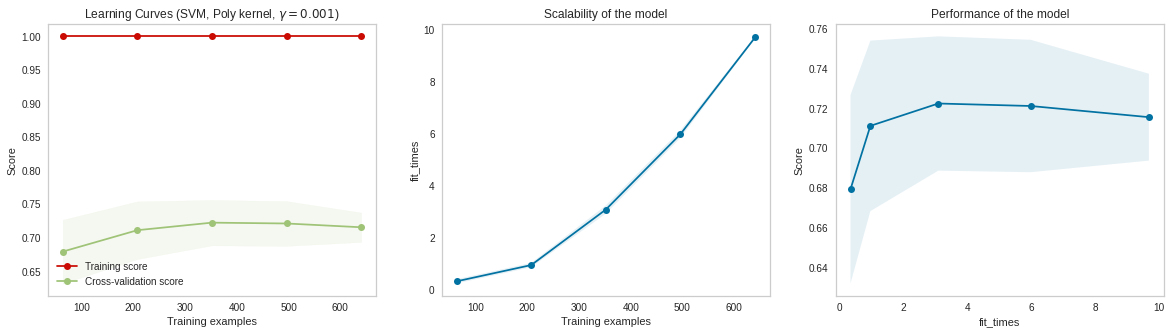

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

title = r"Learning Curves (SVM, Poly kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.1, kernel = 'poly')
plot_learning_curve(estimator, title, copy.deepcopy(x_svm), copy.deepcopy(y_svm),
                    cv=cv, n_jobs=1)

plt.show()